# Capturar resultados

- Requiere los archivos de resultados para funcionar

In [ ]:
import pandas as pd

results_set = []
for i in range(1, 25):
    archivo = f'kNN06-test-params01_02_v{i}.csv'
    # Se leen los archivos de resultados de los tests y se almacenan en un DataFrame
    ds = pd.read_csv(archivo)
    # Se encuentra el indice del máximo de mean_test_f1_weighted
    r = ds['mean_test_f1_weighted'].idxmax()
    leyenda = f'El resultado se encontró en el archivo {archivo}, en la fila {r+2}'
    # Se agrega el máximo de mean, así como los params y el std correspondientes
    results_set.append([ds['params'][r], ds['mean_test_f1_weighted'].max(),ds['std_test_f1_weighted'][r], leyenda])


# Se crea un DataFrame con los resultados y se guarda en un archivo csv
ds = pd.DataFrame(results_set, columns=['params', 'mean_test_f1_weighted', 'std_test_f1_weighted', 'leyenda'])
ds.to_csv('Resultados.csv', index=False, float_format='%.15f')

# Crear gráfico

- Requiere los archivos de resultados para funcionar

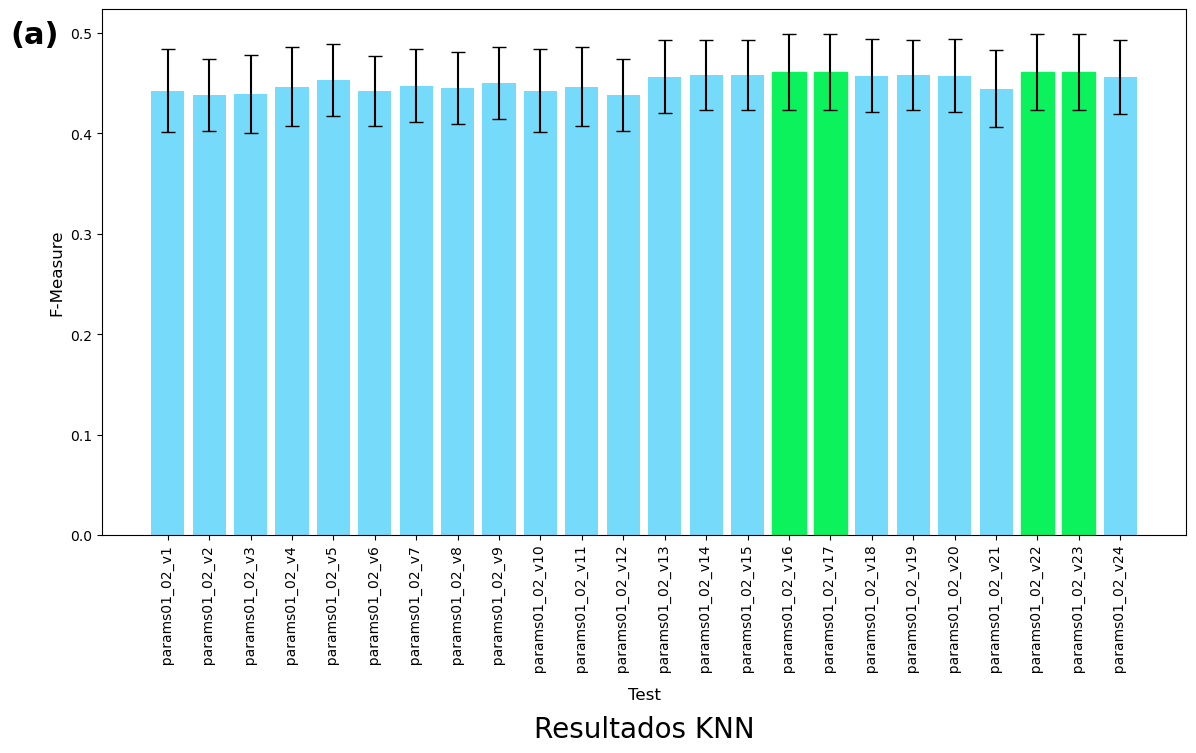

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

results_set = []
for i in range(1, 25):
    archivo = f'kNN06-test-params01_02_v{i}.csv'
    # Se leen los archivos de resultados de los tests y se almacenan en un DataFrame
    ds = pd.read_csv(archivo)
    # Se encuentra el indice del máximo de mean_test_f1_weighted
    r = ds['mean_test_f1_weighted'].idxmax()
    leyenda = f'  params01_02_v{i}'
    # Se agrega el máximo de mean, así como los params y el std correspondientes
    results_set.append([ds['params'][r], ds['mean_test_f1_weighted'].max(),ds['std_test_f1_weighted'][r], leyenda])

# Se crea un DataFrame con los resultados y se guarda en un archivo csv
df = pd.DataFrame(results_set, columns=['params', 'mean_test_f1_weighted', 'std_test_f1_weighted', 'leyenda'])
max_value = df['mean_test_f1_weighted'].max()

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(df)), df['mean_test_f1_weighted'], yerr=df['std_test_f1_weighted'], color='#76DBFA', capsize=5)
for i, bar in enumerate(bars):
    if df['mean_test_f1_weighted'][i] == max_value:
        bar.set_color('#0CF25D')
plt.xticks(range(len(df)), df['leyenda'], rotation=90)
plt.xlabel('Test', fontsize=12)
plt.ylabel('F-Measure', fontsize=12)
# Modificar el título
plt.title('Resultados KNN', fontsize=20, y=-0.4)
plt.text(-0.04, 0.98, '(a)', transform=plt.gca().transAxes, fontsize=22, fontweight='bold', ha='right', va='top')
plt.tight_layout()

# Guardar el gráfico como svg
plt.savefig('grafico.svg', format='svg')

# Mostrar el gráfico
plt.show()
